In [2]:
import darts

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries


In [5]:
!pip install sktime

  Using cached sktime-0.9.0.tar.gz (12.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_learn-1.0.2-cp310-cp310-macosx_10_13_x86_64.whl (8.0 MB)
  Using cached statsmodels-0.13.2-cp310-cp310-macosx_10_9_x86_64.whl (9.7 MB)
  Using cached numba-0.55.1-cp310-cp310-macosx_10_14_x86_64.whl (2.3 MB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached statsmodels-0.12.1.tar.gz (17.4 MB)
  Installing build dependencies ... /^C
anceled
ERROR: Operation cancelled by user


In [12]:
def split_df(df, split=0.9):
    """
    Split into training and test set 

    args:
    -----
        df: Pandas DataFrame with 
        split: float between 0.0 and 1.0
               Portion to allocate to the training set
    return:
    -------
        df_train: 
        df_valid:
        df_test: 
    """
    split_index0 = int(len(df) * split)

    split_index1 = split_index0 + (len(df) - split_index0) // 2

    df_train = df.iloc[:split_index0]
    df_valid = df.iloc[split_index0:split_index1]
    df_test = df.iloc[split_index1:]

    return df_train, df_valid, df_test

In [13]:
power_installed = [30000, 31000, 38150]
farm=0

In [21]:
model = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0
)


In [51]:
histo_features = ['histoWindSpeedNorm0_80', 'histoWindSpeedAngle0_80',
                      'histoTemperature0_80', 'histoWindSpeedNorm0_100',
                      'histoWindSpeedAngle0_100', 'histoTemperature0_100']

forecast_features = ['windSpeedNorm0_80', 'windSpeedAngle0_80', 'temperature0_80',
                         'windSpeedNorm0_100', 'windSpeedAngle0_100', 'temperature0_100']

In [15]:
new_df = pd.read_csv(f"data/output15/dataset{farm}_15.csv")
new_df["prod_wf0"] = new_df["prod_wf0"] / power_installed[farm]

df_train, df_valid, df_test = split_df(new_df, split=0.8)

In [37]:
model = BlockRNNModel(
    model="LSTM",
    input_chunk_length=96,
    output_chunk_length=96+48,
    n_epochs=3,
    random_state=0,
)


In [38]:
model.fit(series=train_serie,
          past_covariates=train_cov_serie,
          verbose=True,)

[2022-05-05 11:05:54,520] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 29343 samples.
[2022-05-05 11:05:54,520] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 29343 samples.
[2022-05-05 11:05:54,532] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-05 11:05:54,532] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-05 11:05:54,547] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-05-05 11:05:54,547] WARNING | darts.models.forecasting.torch_forecasting_model | Dep

Epoch 2: 100%|██████████| 917/917 [00:44<00:00, 20.56it/s, loss=0.0276]


In [39]:
pred = model.predict(n=96+48, series=train_serie)

Predicting: 917it [00:00, ?it/s]


Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting: 917it [00:00, ?it/s]
Predicting

[2022-05-05 11:18:22,880] ERROR | darts.metrics.metrics | ValueError: The actual series must be strictly positive to compute the MAPE.


ValueError: The actual series must be strictly positive to compute the MAPE.

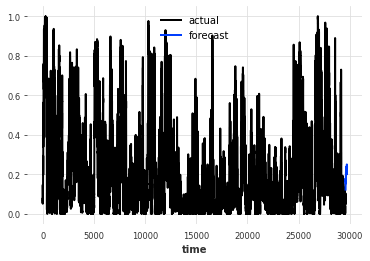

In [47]:
backtest = model.historical_forecasts(
    train_serie,
    past_covariates=train_cov_serie,
    start=0.6,
    forecast_horizon=96+48,
    stride=1,
    retrain=False)

train_serie.plot(label="actual")
pred.plot(label="forecast")
plt.legend()
print("MAPE (using covariates) = {:.2f}%".format(mape(train_serie, backtest)))

In [48]:
backtest

<TimeSeries (DataArray) (time: 11691, component: 1, sample: 1)>
array([[[0.14036291]],

       [[0.13957268]],

       [[0.13971139]],

       ...,

       [[0.10745677]],

       [[0.10644986]],

       [[0.10905267]]])
Coordinates:
  * time       (time) int64 17891 17892 17893 17894 ... 29578 29579 29580 29581
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

[2022-05-05 10:43:58,221] WARNING | darts.timeseries | Number of components is larger than 10 (19). Plotting only the first 10 components.


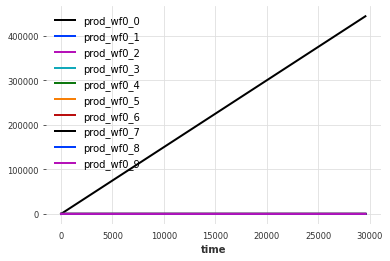

In [20]:
train_serie.plot(label="")

In [105]:
from darts.models import TFTModel

train_cov_serie = TimeSeries.from_dataframe(df_train[histo_features])
train_serie = TimeSeries.from_dataframe(df_train[["prod_wf0"]])
train_future_serie = TimeSeries.from_dataframe(df_train[forecast_features])

valid_cov_serie = TimeSeries.from_dataframe(df_valid[histo_features])
valid_serie = TimeSeries.from_dataframe(df_valid[["prod_wf0"]])
valid_future_serie = TimeSeries.from_dataframe(df_valid[forecast_features])


scaler_cov_serie = Scaler()
scaler_serie = Scaler()
scaler_future_serie = Scaler()

train_cov_serie = scaler_cov_serie.fit_transform(train_cov_serie)
train_serie = scaler_serie.fit_transform(train_serie)
train_future_serie = scaler_future_serie.fit_transform(train_future_serie)

valid_cov_serie = scaler_cov_serie.fit_transform(valid_cov_serie)
valid_serie = scaler_serie.fit_transform(valid_serie)
valid_future_serie = scaler_future_serie.fit_transform(valid_future_serie)

gap = 48
fh = 96
histo_size = 96


In [142]:
model = TFTModel(input_chunk_length=histo_size, output_chunk_length=gap+fh, 
                 hidden_size=128,
                 model_name='TFTModel', save_checkpoints=True, force_reset=True)

In [143]:
model.fit(series=train_serie,
          past_covariates=train_cov_serie,
          future_covariates=train_future_serie,
          val_series=valid_serie,
          val_past_covariates=valid_cov_serie,
          val_future_covariates=valid_future_serie,
          max_samples_per_ts=1)

[2022-05-05 12:26:45,867] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
[2022-05-05 12:26:45,867] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
[2022-05-05 12:26:45,954] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-05 12:26:45,954] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | static_covariates_vsn             | _VariableSelectionNetwork        | 0     
1  | encoder_vsn                       | _VariableSelectionNetwork        | 44.0 K
2  | decoder_vsn              

Epoch 9:  50%|█████     | 1/2 [00:00<00:00,  5.61it/s, loss=1.61]
Validating: 0it [00:00, ?it/s]
Epoch 19:  50%|█████     | 1/2 [00:00<00:00,  5.96it/s, loss=1.21]
Validating: 0it [00:00, ?it/s]
Epoch 29:  50%|█████     | 1/2 [00:00<00:00,  6.11it/s, loss=0.77] 
Validating: 0it [00:00, ?it/s]
Epoch 39:  50%|█████     | 1/2 [00:00<00:00,  5.99it/s, loss=0.682]
Validating: 0it [00:00, ?it/s]
Epoch 49:  50%|█████     | 1/2 [00:00<00:00,  5.88it/s, loss=0.611]
Validating: 0it [00:00, ?it/s]
Epoch 59:  50%|█████     | 1/2 [00:00<00:00,  5.96it/s, loss=0.564]
Validating: 0it [00:00, ?it/s]
Epoch 69:  50%|█████     | 1/2 [00:00<00:00,  6.04it/s, loss=0.538]
Validating: 0it [00:00, ?it/s]
Epoch 79:  50%|█████     | 1/2 [00:00<00:00,  6.06it/s, loss=0.526]
Validating: 0it [00:00, ?it/s]
Epoch 89:  50%|█████     | 1/2 [00:00<00:00,  6.11it/s, loss=0.517]
Validating: 0it [00:00, ?it/s]
Epoch 99:  50%|█████     | 1/2 [00:00<00:00,  5.25it/s, loss=0.506]
Validating: 0it [00:00, ?it/s]
Epoch 99: 100

In [133]:
best_model = model.load_from_checkpoint(model_name='TFTModel.model', best=True)

[2022-05-05 12:18:45,695] INFO | darts.models.forecasting.torch_forecasting_model | loading best-epoch=29-val_loss=1.32.ckpt
[2022-05-05 12:18:45,695] INFO | darts.models.forecasting.torch_forecasting_model | loading best-epoch=29-val_loss=1.32.ckpt


In [106]:
train_future_serie = train_future_serie.concatenate(valid_future_serie, axis=0)
train_cov_serie = train_cov_serie.concatenate(valid_cov_serie, axis=0)[:-(gap+fh)]
train_serie = train_serie.concatenate(valid_serie, axis=0)[:-(gap+fh)]

In [107]:
prediction = model.predict(n=gap+fh,
                           series=train_serie,
                           past_covariates=train_cov_serie,
                           future_covariates=train_future_serie)

Predicting: 100%|██████████| 1/1 [00:00<?, ?it/s]


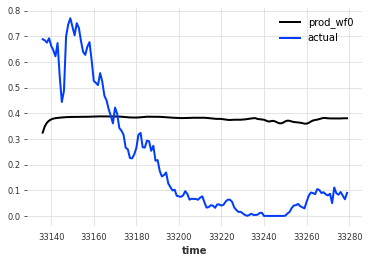

In [119]:
prediction.plot("pred")
valid_serie[-(gap+fh):].plot(label="actual")

In [126]:
pred_array = prediction.values()

In [98]:
train_future_serie.time_index

RangeIndex(start=0, stop=33280, step=1, name='time')

In [62]:
valid_future_serie

<TimeSeries (DataArray) (time: 29582, component: 6, sample: 1)>
array([[[0.35505277],
        [0.5621082 ],
        [0.30982555],
        [0.33583292],
        [0.56543134],
        [0.31181604]],

       [[0.34634044],
        [0.56216112],
        [0.30896984],
        [0.32805975],
        [0.56601686],
        [0.31089327]],

       [[0.35340396],
        [0.55645489],
        [0.30881965],
        [0.33424212],
        [0.56008377],
        [0.31066532]],
...
       [[0.29613233],
        [0.58213603],
        [0.41546043],
        [0.2814254 ],
        [0.58595622],
        [0.4172492 ]],

       [[0.29055526],
        [0.57827785],
        [0.41406102],
        [0.27556587],
        [0.58175439],
        [0.41588059]],

       [[0.29984475],
        [0.56413772],
        [0.41310685],
        [0.28298417],
        [0.5666753 ],
        [0.41494603]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 ... 29576 29577 29578 29579 29580 29581
  * component  (component) object 'windSpeedNorm0_80' ... 'temperature0_100'
Dimensions without coordinates: sample

In [65]:
df_train

,index,histoWindSpeedNorm0_80,histoWindSpeedAngle0_80,histoTemperature0_80,histoWindSpeedNorm0_100,histoWindSpeedAngle0_100,histoTemperature0_100,windSpeedNorm0_80,windSpeedAngle0_80,temperature0_80,windSpeedNorm0_100,windSpeedAngle0_100,temperature0_100,prod_wf0,time,YEAR,DAYOFYEAR,HOUR,MIN
time,,,,,,,,,,,,,,,,,,,
0,14,7.215978,0.305706,-0.412114,7.542262,0.297523,-0.539247,6.351998,0.388808,-0.282497,6.408856,0.409924,-0.383266,0.147778,1.062442e+09,2021,18,0,15
1,29,7.260157,0.298013,-0.451361,7.575620,0.290138,-0.580602,6.197389,0.389141,-0.317437,6.262041,0.413596,-0.420790,0.110222,1.062442e+09,2021,18,0,30
2,44,7.154009,0.296903,-0.478237,7.461929,0.289605,-0.607637,6.322739,0.353309,-0.323570,6.378810,0.376387,-0.430060,0.100000,1.062442e+09,2021,18,0,45
3,59,7.070258,0.299892,-0.494900,7.374396,0.292974,-0.623588,6.330510,0.303229,-0.293791,6.369871,0.322345,-0.397954,0.119556,1.062442e+09,2021,18,1,0
4,74,6.983732,0.299516,-0.506446,7.287857,0.292800,-0.634659,6.332954,0.247574,-0.280273,6.363029,0.265617,-0.385587,0.107556,1.062442e+09,2021,18,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,443846,4.925934,0.281481,4.959379,5.204857,0.280336,4.845398,5.494843,0.572107,4.190976,5.585115,0.596737,4.058199,0.068000,1.062879e+09,2021,321,15,0
29578,443861,4.956333,0.192745,4.982750,5.234008,0.195199,4.866893,5.516800,0.543559,4.106446,5.603893,0.568746,3.978103,0.076444,1.062879e+09,2021,321,15,15
29579,443876,5.190131,0.180146,4.975667,5.452160,0.178816,4.857788,5.306390,0.514570,4.030804,5.381236,0.538643,3.904143,0.097778,1.062879e+09,2021,321,15,30


In [68]:
list(df_valid.index)

[29582,
 29583,
 29584,
 29585,
 29586,
 29587,
 29588,
 29589,
 29590,
 29591,
 29592,
 29593,
 29594,
 29595,
 29596,
 29597,
 29598,
 29599,
 29600,
 29601,
 29602,
 29603,
 29604,
 29605,
 29606,
 29607,
 29608,
 29609,
 29610,
 29611,
 29612,
 29613,
 29614,
 29615,
 29616,
 29617,
 29618,
 29619,
 29620,
 29621,
 29622,
 29623,
 29624,
 29625,
 29626,
 29627,
 29628,
 29629,
 29630,
 29631,
 29632,
 29633,
 29634,
 29635,
 29636,
 29637,
 29638,
 29639,
 29640,
 29641,
 29642,
 29643,
 29644,
 29645,
 29646,
 29647,
 29648,
 29649,
 29650,
 29651,
 29652,
 29653,
 29654,
 29655,
 29656,
 29657,
 29658,
 29659,
 29660,
 29661,
 29662,
 29663,
 29664,
 29665,
 29666,
 29667,
 29668,
 29669,
 29670,
 29671,
 29672,
 29673,
 29674,
 29675,
 29676,
 29677,
 29678,
 29679,
 29680,
 29681,
 29682,
 29683,
 29684,
 29685,
 29686,
 29687,
 29688,
 29689,
 29690,
 29691,
 29692,
 29693,
 29694,
 29695,
 29696,
 29697,
 29698,
 29699,
 29700,
 29701,
 29702,
 29703,
 29704,
 29705,
 29706,
